In [101]:
#Conexió al Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


S'han sel·leccionat 4 Estacions Meteorologiques (EMA) per extreure les dades agrometeorologiques que serviran de referencia pel calcul de CWSI.

Les EMA son CONSTANTI, VILARODONA, RIUDOMS I RIUDECANYES.

El període descarregat comprén de 2007-2024, tot i que en posterioritat, per adecuació al conjunt de dades de superficies de cultius és filtrarà al periode 2016-2024.

L'elecció de les EMA ha estat per distribució geogràfica i per disponibilitat de dades.

RIUDOM i RIUDECANYES abarquen una mateixa zona, però en periodes diferenciats.

Posterior a la càrrega i unió del diferents arxius, es realitzen diferents tractaments.

Així, es filtren les dades per les hores de referencia en que els saate·lits extreuen les imatges. En aquest cas, les 11:00 i les 13:00. Aquests filtratge es indispensable per que posteriormente, al creuar les dades meteorologiques amb les dades de Temperaura de coberta extreta de satel·lit, ambdues siguin de la mateixa franja horaria (aproxiamda).

També es realitzen filtrratges de varaibles i adecuació de formats.

In [102]:
import pandas as pd
import xlrd
import glob
#Recopilació i tractament de les dades agrometeorologiques

#Estació meteorologica de constanti
path = '/content/drive/MyDrive/Colab Notebooks/data/data_EAM_constanti_hora/*.xls'

arxius = glob.glob(path)
lista_dataframes_constanti = []

#Iteració sobre les arxius xls i creació llista dataframes.
for i in arxius:
    df = pd.read_excel(i, engine='xlrd')
    lista_dataframes_constanti.append(df)

#Concatenació dels arxius xls.
data_hora_constanti = pd.concat(lista_dataframes_constanti, ignore_index=True)

data_hora_constanti['EAM'] = 'CONSTANTI'

data_hora_constanti.head()

WARNING *** file size (3766273) not 512 + multiple of sector size (512)
WARNING *** file size (3701249) not 512 + multiple of sector size (512)
WARNING *** file size (3756033) not 512 + multiple of sector size (512)
WARNING *** file size (3766273) not 512 + multiple of sector size (512)
WARNING *** file size (3744257) not 512 + multiple of sector size (512)
WARNING *** file size (3766273) not 512 + multiple of sector size (512)
WARNING *** file size (3774465) not 512 + multiple of sector size (512)
WARNING *** file size (3763201) not 512 + multiple of sector size (512)
WARNING *** file size (3756033) not 512 + multiple of sector size (512)
WARNING *** file size (3747841) not 512 + multiple of sector size (512)
WARNING *** file size (3695617) not 512 + multiple of sector size (512)
WARNING *** file size (3756033) not 512 + multiple of sector size (512)
WARNING *** file size (3756033) not 512 + multiple of sector size (512)
WARNING *** file size (3754497) not 512 + multiple of sector siz

,Data,Hora,Temperatura de subsòl a 50 cm,Temperatura del punt de rosada,Temperatura,Temperatura del termòmetre humit,Temperatura màxima,Temperatura mínima,Temperatura de subsòl a 5 cm,Velocitat del vent a 10 m (esc.),...,Humitat relativa mínima,Pressió parcial de vapor,Precipitació,Irradiància solar global,Irradiància neta,Humectació moll,Humectació sec,Humectació res,Evapotranspiració de referència,EAM
0,01/01/2024,01:00,11.1,0.9,6.8,4.2,7.8,6.3,7.8,1.4,...,62,7,0.0,0,-24,0.0,1.0,180,0,CONSTANTI
1,01/01/2024,02:00,11.1,1.1,7.2,4.4,8.1,6.6,7.7,1.4,...,61,7,0.0,0,-24,0.0,1.0,172,0,CONSTANTI
2,01/01/2024,03:00,11.1,1.3,6.6,4.2,8.0,5.3,7.6,1.1,...,62,7,0.0,0,-24,0.32,0.68,101,0,CONSTANTI
3,01/01/2024,04:00,11.1,1.5,6.4,4.2,7.2,5.5,7.4,1.5,...,68,7,0.0,0,-22,0.84,0.16,38,0,CONSTANTI
4,01/01/2024,05:00,11.1,2.3,6.2,4.4,7.5,5.1,7.4,1.2,...,69,7,0.0,0,-28,0.88,0.12,22,0,CONSTANTI


In [103]:
#Estació meteorologica de Riudoms
path1 = '/content/drive/MyDrive/Colab Notebooks/data/data_EAM_riudoms_hora/*.xls'

arxius = glob.glob(path1)
lista_dataframes_riudoms = []

for i in arxius:
    df = pd.read_excel(i, engine='xlrd')
    lista_dataframes_riudoms.append(df)

data_hora_riudoms = pd.concat(lista_dataframes_riudoms, ignore_index=True)

data_hora_riudoms['EAM'] = 'RIUDOMS'

data_hora_riudoms.head()

WARNING *** file size (3120129) not 512 + multiple of sector size (512)
WARNING *** file size (3128833) not 512 + multiple of sector size (512)
WARNING *** file size (3120129) not 512 + multiple of sector size (512)
WARNING *** file size (3120129) not 512 + multiple of sector size (512)
WARNING *** file size (3120129) not 512 + multiple of sector size (512)
WARNING *** file size (3128833) not 512 + multiple of sector size (512)
WARNING *** file size (3117569) not 512 + multiple of sector size (512)
WARNING *** file size (2732033) not 512 + multiple of sector size (512)
WARNING *** file size (3088897) not 512 + multiple of sector size (512)
WARNING *** file size (3093505) not 512 + multiple of sector size (512)
WARNING *** file size (3085313) not 512 + multiple of sector size (512)


,Data,Hora,Temperatura,Temperatura màxima,Temperatura mínima,Temperatura del punt de rosada,Temperatura del termòmetre humit,Velocitat escalar del vent a 2m,Direcció del vent a 2 m (m. 1),Humitat relativa màxima,Humitat relativa,Humitat relativa mínima,Pressió parcial de vapor,Precipitació,Irradiància solar global,Humectació moll,Humectació sec,Humectació res,Evapotranspiració de referència,EAM
0,01/01/2019,01:00,11.9,13.5,9.9,-2.6,5.6,0.5,--,39,36,34,5,0,0,0,1,7999,0,RIUDOMS
1,01/01/2019,02:00,13.4,13.9,12.7,-2.1,6.5,1.1,--,35,34,33,5,0,0,0,1,7999,0,RIUDOMS
2,01/01/2019,03:00,12.5,13,11,-2.1,6.0,1.1,--,41,36,34,5,0,0,0,1,7999,0,RIUDOMS
3,01/01/2019,04:00,10.6,12.3,9.2,-0.8,5.5,0.6,--,49,45,41,6,0,0,0,1,7999,0,RIUDOMS
4,01/01/2019,05:00,10.6,12.4,8.2,-0.2,5.7,0.6,--,56,47,41,6,0,0,0,1,7999,0,RIUDOMS


In [104]:
#Estació meteorologica de rIUDECANYES
path2 = '/content/drive/MyDrive/Colab Notebooks/data/data_EAM_riudoms_hora/riudecanyes/*.xls'

arxius = glob.glob(path2)
lista_dataframes_riudecanyes = []

for i in arxius:
    df = pd.read_excel(i, engine='xlrd')
    lista_dataframes_riudecanyes.append(df)

data_hora_riudecanyes = pd.concat(lista_dataframes_riudecanyes, ignore_index=True)

data_hora_riudecanyes['EAM'] = 'RIUDOMS'

#Transformem velñocitat del vent de 10 a 2 m.
data_hora_riudecanyes['Velocitat del vent a 10 m (esc.)'] = pd.to_numeric(data_hora_riudecanyes['Velocitat del vent a 10 m (esc.)'], errors='coerce')
data_hora_riudecanyes['Velocitat escalar del vent a 2m'] = data_hora_riudecanyes['Velocitat del vent a 10 m (esc.)'] * 0.748

data_hora_riudecanyes.head()

WARNING *** file size (2048513) not 512 + multiple of sector size (512)
WARNING *** file size (2097665) not 512 + multiple of sector size (512)
WARNING *** file size (2097665) not 512 + multiple of sector size (512)
WARNING *** file size (2048513) not 512 + multiple of sector size (512)
WARNING *** file size (1835521) not 512 + multiple of sector size (512)


,Data,Hora,Temperatura màxima,Temperatura mínima,Temperatura,Velocitat del vent a 10 m (esc.),Humitat relativa,Humitat relativa mínima,Humitat relativa màxima,Precipitació,Irradiància solar global,Evapotranspiració de referència,EAM,Velocitat escalar del vent a 2m
0,01/01/2023,01:00,10.0,8.3,9.0,1.8,88,80,93,0.0,0,0,RIUDOMS,1.3464
1,01/01/2023,02:00,10.3,7.7,9.1,2.0,84,79,94,0.0,0,0,RIUDOMS,1.4960
2,01/01/2023,03:00,9.7,8.1,9.0,2.4,85,80,93,0.0,0,0,RIUDOMS,1.7952
3,01/01/2023,04:00,9.9,9.0,9.6,2.8,80,79,84,0.0,0,0,RIUDOMS,2.0944
4,01/01/2023,05:00,10.0,7.2,9.0,1.8,83,78,95,0.0,0,0,RIUDOMS,1.3464


In [105]:
#Estació meteorologica de VILARODONA
path3 = '/content/drive/MyDrive/Colab Notebooks/data/data_EAM_vilarodona_hora/*.xls'

arxius = glob.glob(path3)
lista_dataframes_vilarodona = []

for i in arxius:
    df = pd.read_excel(i, engine='xlrd')
    lista_dataframes_vilarodona.append(df)

data_hora_vilarodona = pd.concat(lista_dataframes_vilarodona, ignore_index=True)

data_hora_vilarodona['EAM'] = 'VILARODONA'

data_hora_vilarodona.head()


WARNING *** file size (2678785) not 512 + multiple of sector size (512)
WARNING *** file size (2678785) not 512 + multiple of sector size (512)
WARNING *** file size (2683393) not 512 + multiple of sector size (512)
WARNING *** file size (2750977) not 512 + multiple of sector size (512)
WARNING *** file size (2685953) not 512 + multiple of sector size (512)
WARNING *** file size (2678785) not 512 + multiple of sector size (512)
WARNING *** file size (2685441) not 512 + multiple of sector size (512)
WARNING *** file size (2678785) not 512 + multiple of sector size (512)
WARNING *** file size (2684417) not 512 + multiple of sector size (512)


,Data,Hora,Temperatura,Temperatura màxima,Temperatura mínima,Temperatura del punt de rosada,Temperatura del termòmetre humit,Velocitat del vent a 10 m (esc.),Velocitat escalar del vent a 2m,Humitat relativa màxima,Humitat relativa,Humitat relativa mínima,Pressió parcial de vapor,Precipitació,Irradiància solar global,Evapotranspiració de referència,EAM
0,01/01/2023,01:00,7.6,8.2,7.1,5.4,6.5,1,0.7,89,86,83,9,0.0,0,0,VILARODONA
1,01/01/2023,02:00,7.4,8.0,6.9,5.4,6.4,0.8,0.6,92,87,83,9,0.0,0,0,VILARODONA
2,01/01/2023,03:00,7.6,8.3,6.8,5.3,6.4,0.8,0.6,92,85,82,9,0.0,0,0,VILARODONA
3,01/01/2023,04:00,7.7,8.9,6.8,5.5,6.6,1,0.7,94,86,80,9,0.0,0,0,VILARODONA
4,01/01/2023,05:00,8.0,8.5,7.5,5.5,6.7,0.8,0.6,86,84,82,9,0.0,0,0,VILARODONA


In [106]:
#Unio dades de les 4 estacions meteorologiques
data_TVDI = pd.concat([data_hora_constanti, data_hora_riudoms, data_hora_riudecanyes, data_hora_vilarodona], ignore_index=True)
#Filtratge de les campanayes a les dades disponibles referents a les extensión de cultius 2016-2024
data_TVDI

,Data,Hora,Temperatura de subsòl a 50 cm,Temperatura del punt de rosada,Temperatura,Temperatura del termòmetre humit,Temperatura màxima,Temperatura mínima,Temperatura de subsòl a 5 cm,Velocitat del vent a 10 m (esc.),...,Humitat relativa mínima,Pressió parcial de vapor,Precipitació,Irradiància solar global,Irradiància neta,Humectació moll,Humectació sec,Humectació res,Evapotranspiració de referència,EAM
0,01/01/2024,01:00,11.1,0.9,6.8,4.2,7.8,6.3,7.8,1.4,...,62,7,0.0,0,-24,0.0,1.0,180,0,CONSTANTI
1,01/01/2024,02:00,11.1,1.1,7.2,4.4,8.1,6.6,7.7,1.4,...,61,7,0.0,0,-24,0.0,1.0,172,0,CONSTANTI
2,01/01/2024,03:00,11.1,1.3,6.6,4.2,8.0,5.3,7.6,1.1,...,62,7,0.0,0,-24,0.32,0.68,101,0,CONSTANTI
3,01/01/2024,04:00,11.1,1.5,6.4,4.2,7.2,5.5,7.4,1.5,...,68,7,0.0,0,-22,0.84,0.16,38,0,CONSTANTI
4,01/01/2024,05:00,11.1,2.3,6.2,4.4,7.5,5.1,7.4,1.2,...,69,7,0.0,0,-28,0.88,0.12,22,0,CONSTANTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404278,31/12/2016,20:00,NaN,3.0,4.8,4.0,5.4,4.3,NaN,1.6,...,86,8,0.0,0,NaN,NaN,NaN,NaN,0,VILARODONA
404279,31/12/2016,21:00,NaN,2.5,4.6,3.6,4.9,4,NaN,2,...,84,7,0.0,0,NaN,NaN,NaN,NaN,0,VILARODONA
404280,31/12/2016,22:00,NaN,2.1,3.6,2.9,3.9,3.3,NaN,1.4,...,88,7,0.0,0,NaN,NaN,NaN,NaN,0,VILARODONA
404281,31/12/2016,23:00,NaN,2.0,3.2,2.7,3.5,3,NaN,2,...,91,7,0.0,0,NaN,NaN,NaN,NaN,0,VILARODONA


In [107]:
# Obtén el nombre de NaN per columna
nan_counts_per_column = data_TVDI.isnull().sum()

# Imprimeix els resultats
print(nan_counts_per_column)

Data                                     0
Hora                                     0
Temperatura de subsòl a 50 cm       246176
Temperatura del punt de rosada       60955
Temperatura                              0
Temperatura del termòmetre humit     60955
Temperatura màxima                       0
Temperatura mínima                       0
Temperatura de subsòl a 5 cm        246176
Velocitat del vent a 10 m (esc.)    106074
Velocitat escalar del vent a 2m         21
Direcció del vent a 2 m (m. 1)      140123
Humitat relativa màxima                  0
Humitat relativa                         0
Humitat relativa mínima                  0
Pressió parcial de vapor             60955
Precipitació                             0
Irradiància solar global                 0
Irradiància neta                    246176
Humectació moll                     140123
Humectació sec                      140123
Humectació res                      140123
Evapotranspiració de referència          0
EAM        

In [108]:
# Columnes a transformar
columnes_a_transformar = ['Temperatura', 'Evapotranspiració de referència',
                          'Irradiància solar global', 'Velocitat escalar del vent a 2m',
                          'Temperatura mínima', 'Temperatura màxima', 'Pressió parcial de vapor',
                          'Precipitació']

# Aplicar la transformació numèrica a les columnes especificades
for columna in columnes_a_transformar:
    if columna in data_TVDI.columns:  # Comprovar si la columna existeix
        data_TVDI[columna] = pd.to_numeric(data_TVDI[columna], errors='coerce')

# Combina 'Data' i 'Hora' en una sola columna de datetime
# S'especifica el format de la data com a 'dayfirst=True' per a indicar que el dia ve primer
data_TVDI['Data'] = pd.to_datetime(data_TVDI['Data'], dayfirst=True)


# Assegura que "Humitat relativa màxima" és de tipus enter si no té decimals
# Si té decimals, es mantindrà com a float
data_TVDI['Humitat relativa'] = data_TVDI['Humitat relativa'].astype(int, errors='ignore')


# Comprovar els tipus de dades després de la transformació
data_TVDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404283 entries, 0 to 404282
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Data                              404283 non-null  datetime64[ns]
 1   Hora                              404283 non-null  object        
 2   Temperatura de subsòl a 50 cm     158107 non-null  object        
 3   Temperatura del punt de rosada    343328 non-null  object        
 4   Temperatura                       395116 non-null  float64       
 5   Temperatura del termòmetre humit  343328 non-null  object        
 6   Temperatura màxima                395011 non-null  float64       
 7   Temperatura mínima                395011 non-null  float64       
 8   Temperatura de subsòl a 5 cm      158107 non-null  object        
 9   Velocitat del vent a 10 m (esc.)  298209 non-null  object        
 10  Velocitat escalar del vent a 2m 

In [126]:
# Seelccio de variables
columnes_selecció = ['Data', 'Hora', 'Temperatura', 'Evapotranspiració de referència',
                          'Irradiància solar global', 'Velocitat escalar del vent a 2m',
                          'Temperatura mínima', 'Temperatura màxima',
                          'Precipitació', 'Humitat relativa', 'EAM']

data_TVDI_filtred = data_TVDI[columnes_selecció]
data_TVDI_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404283 entries, 0 to 404282
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Data                             404283 non-null  datetime64[ns]
 1   Hora                             404283 non-null  object        
 2   Temperatura                      395116 non-null  float64       
 3   Evapotranspiració de referència  402590 non-null  float64       
 4   Irradiància solar global         395078 non-null  float64       
 5   Velocitat escalar del vent a 2m  404075 non-null  float64       
 6   Temperatura mínima               395011 non-null  float64       
 7   Temperatura màxima               395011 non-null  float64       
 8   Precipitació                     395227 non-null  float64       
 9   Humitat relativa                 404283 non-null  object        
 10  EAM                              404283 non-

In [129]:
# Filtratge
data_TVDI_filtred = data_TVDI_filtred[data_TVDI_filtred['Hora'].isin(["11:00", "13:00"])]
data_TVDI_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33602 entries, 10 to 404271
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Data                             33602 non-null  datetime64[ns]
 1   Hora                             33602 non-null  object        
 2   Temperatura                      32841 non-null  float64       
 3   Evapotranspiració de referència  33549 non-null  float64       
 4   Irradiància solar global         32838 non-null  float64       
 5   Velocitat escalar del vent a 2m  33580 non-null  float64       
 6   Temperatura mínima               32833 non-null  float64       
 7   Temperatura màxima               32833 non-null  float64       
 8   Precipitació                     32851 non-null  float64       
 9   Humitat relativa                 33602 non-null  object        
 10  EAM                              33602 non-null  object      

In [130]:
# Acumulació precipitació de tot el dia i assignació del valor a cada registre/hora
daily_precipitation = data_TVDI_filtred.groupby('Data')['Precipitació'].sum().reset_index()
data_TVDI_filtred = data_TVDI_filtred.merge(daily_precipitation, on='Data', how='left', suffixes=('_x', '_daily'))
data_TVDI_filtred = data_TVDI_filtred.rename(columns={'Precipitació_daily': 'Precipitació'})
#Eliminació columna adicional
data_TVDI_filtred = data_TVDI_filtred.drop(columns=['Precipitació_x'])

In [132]:
#Creació varaible Satellit
data_TVDI_filtred['Satellit'] = data_TVDI_filtred['Hora'].apply(lambda hora: 'T' if hora == '11:00' else 'A')

# Creació variable Campanya
data_TVDI_filtred['Campanya'] = data_TVDI_filtred['Data'].dt.year

data_TVDI_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33602 entries, 0 to 33601
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Data                             33602 non-null  datetime64[ns]
 1   Hora                             33602 non-null  object        
 2   Temperatura                      32841 non-null  float64       
 3   Evapotranspiració de referència  33549 non-null  float64       
 4   Irradiància solar global         32838 non-null  float64       
 5   Velocitat escalar del vent a 2m  33580 non-null  float64       
 6   Temperatura mínima               32833 non-null  float64       
 7   Temperatura màxima               32833 non-null  float64       
 8   Humitat relativa                 33602 non-null  object        
 9   EAM                              33602 non-null  object        
 10  Precipitació                     33602 non-null  float64  

In [133]:
#Filtratge de campanyes amb dades disponibles de superficie de cultius
campanyes = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
data_TVDI_filtred = data_TVDI_filtred[data_TVDI_filtred['Campanya'].isin(campanyes)]

In [134]:
#Anàlsis del nulls
data_TVDI_filtred.isnull().sum()

,0
Data,0
Hora,0
Temperatura,6
Evapotranspiració de referència,43
Irradiància solar global,10
Velocitat escalar del vent a 2m,22
Temperatura mínima,7
Temperatura màxima,7
Humitat relativa,0
EAM,0


El tractament dels nulls, al tractarse de dades meteorologiques diaries, i d'un percentatge mots baix del total, s'obta per aplicar el mètode interpolate.

In [135]:
#Ordenar dataframe per estacions meteorologiques i data, per aplicar mètode interpolate als nulls.
#Pel nombre total de null detectats, i al considerar-se dades meteorologiques, que la seva variació entre dies no sol ser abrupta,
#es considera una bona pràctica subtituir els nulls amb el mètode interpoalte.
data_TVDI_filtred.sort_values(by=['EAM', 'Data']).reset_index(drop=True)
columnes = ['Temperatura', 'Temperatura mínima', 'Temperatura màxima', 'Humitat relativa', 'Irradiància solar global', 'Evapotranspiració de referència', 'Velocitat escalar del vent a 2m', 'Precipitació' ]
data_TVDI_filtred[columnes] = data_TVDI_filtred[columnes].interpolate(method='linear', limit_direction='both')
data_TVDI_filtred.isnull().sum()

<ipython-input-135-0bbfdfceb391>:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_TVDI_filtred[columnes] = data_TVDI_filtred[columnes].interpolate(method='linear', limit_direction='both')


,0
Data,0
Hora,0
Temperatura,0
Evapotranspiració de referència,0
Irradiància solar global,0
Velocitat escalar del vent a 2m,0
Temperatura mínima,0
Temperatura màxima,0
Humitat relativa,0
EAM,0


A continuació es carreguen les dades de superfíccies de cultius d'avellaner de les tres comarques de referència: Alt Camp, Baix Camp i Tarragones.

El periode compren els anys 2016 - 2024.

Per eficiencia, es filtren les superficcies dels municpis més pròxim a les EMA, i amb major nombre de superficies.

In [136]:
import pandas as pd
#Tracctament de dades cultiu avellaner

#Dades de cultius de les comarques de l'Alt Camp, Baix Camp i Tarragones
#Periode 2016 - 2024 (No existeixen dades amb poligons posteriors a 2016)

cultius = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cultius.csv')
#Selecció variables geoespacials, any, municipi i seca_regad
cultius_f = cultius[['the_geom', 'Campanya', 'Municipi', 'HA']]
#Filtratge de les superficies pels municipis més pròxims a lesEMA i amb major número de superfície cultivada.
cultius_filtred = cultius_f[cultius_f['Municipi'].isin(["RIUDOMS", "CONSTANTI", "VALLS", "SELVA DEL CAMP (LA)", "ALCOVER", "VILALLONGA DEL CAMP", "MILA (EL)"])]
#Comprovació mucipis seleccionats
seleccio_municipis = cultius_filtred['Municipi'].unique()
seleccio_municipis

array(['ALCOVER', 'CONSTANTI', 'MILA (EL)', 'RIUDOMS',
       'SELVA DEL CAMP (LA)', 'VALLS', 'VILALLONGA DEL CAMP'],
      dtype=object)

In [137]:
cultius_f.head()

,the_geom,Campanya,Municipi,HA
0,MULTIPOLYGON (((1.2043639348666806 41.26158840...,2016,ALCOVER,0.0052
1,MULTIPOLYGON (((1.2055894615531502 41.26929662...,2016,ALCOVER,0.6061
2,MULTIPOLYGON (((1.2101844746142387 41.28045045...,2016,ALCOVER,0.1631
3,MULTIPOLYGON (((1.3588773175629218 41.32799973...,2016,AIGUAMURCIA,0.0374
4,MULTIPOLYGON (((1.3583605312388616 41.33041693...,2016,AIGUAMURCIA,0.9645


Un cop seleccionades les superficies dels cultius dels municpis seleccioants per cadascun de les campanyes, es realitza el següent plantejament alhora de simplificar la selecció, i que sigui més representativa alhora d'extreure les dades de LST i NDVI de GEE. En aquest sentit, la distància d'informació entre punts de MONDIS és de 1km. Això, es equivalent a 100hectàries de superficie. Així, l'estratègia plantejada per la selecció de les superficies es:

 1er- Trobar el centroide de cadascún dels polígons de les superficies cultivades.

 2on -Fer combiancions de més de dos centroides, elsquals estiguin a menys de 0.2km, i que la suma de tots sigui igual o major a 90hectaries.

 3er . Assignar un id per a cadascun d'aquest grups.

 El desenvolupament del codi per l'agrupació del poligons segons distància i sumatori d'hectàries s'ha desenvolupat a partir de referencies i de l'assisten de Colab GEmini.

In [138]:
#Veure Exemple:
#https://gis.stackexchange.com/questions/461349/grouping-polygons-by-attributes-and-by-distance-using-geopandas-and-networkx?utm_source=chatgpt.com
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html
import numpy as np
from shapely import wkt
from sklearn.neighbors import BallTree
import networkx as nx

cultius_filtred['geometry'] = cultius_filtred['the_geom'].apply(wkt.loads)
cultius_filtred['centroid'] = cultius_filtred['geometry'].apply(lambda geom: geom.centroid)

# Paràmetres
#Distància màxima de 200m entre poligons
max_distance_km = 0.2
#Superficie mínima que han de sumar els poligons units.
threshold_ha = 90
assigned_ids = []
group_counter = 0

# Agrupació de poligons per Campanya i Municipi. Si hi ha menys de 2 poligos s'ometen
for (municipi, campanya), group in cultius_filtred.groupby(['Municipi', 'Campanya']):
    if len(group) < 2:
        continue

    #Conversió de coordenades a radiants i construcció de BallTree.
    ##https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html
    coords = np.array([[pt.y, pt.x] for pt in group['centroid']])
    radians = np.radians(coords)

    tree = BallTree(radians, metric='haversine')
    #Construcció de Graph, on cada node es un poligon.
    G = nx.Graph()
    G.add_nodes_from(group.index)
    #Iteració sobre 20 veins
    for i, centroid in zip(group.index, radians):
        dists, idxs = tree.query([centroid], k=20)
        for dist, idx in zip(dists[0][1:], idxs[0][1:]):
            j = group.index[idx]
            if dist * 6371 <= max_distance_km:
                G.add_edge(i, j)

    components = list(nx.connected_components(G))
    for comp in components:
        total_ha = cultius_filtred.loc[list(comp), 'HA'].sum()
        if total_ha >= threshold_ha:
            for idx in comp:
                assigned_ids.append({'index': idx, 'id_pol': f'{group_counter}'})
            group_counter += 1

# Assignació de l'ID de grup a cada polígon
id_df = pd.DataFrame(assigned_ids).set_index('index')
cultius_filtred['id_pol'] = id_df['id_pol']
cultius_filtred = cultius_filtred.dropna(subset=['id_pol'])

<ipython-input-138-d7e126e78de6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultius_filtred['geometry'] = cultius_filtred['the_geom'].apply(wkt.loads)
<ipython-input-138-d7e126e78de6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultius_filtred['centroid'] = cultius_filtred['geometry'].apply(lambda geom: geom.centroid)
<ipython-input-138-d7e126e78de6>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [139]:
#Nopmbre de grup de poligons creats
cultius_filtred['id_pol'] = cultius_filtred['id_pol'].astype(int)
id_pol = cultius_filtred['id_pol'].unique()
id_pol.sort()
print(id_pol)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [140]:
#Assignació a cada muinicipi un valor de Estació Meteorologica EMA
#S'assigna variable EMA al dataset de cultius per poder unir posteriorment amb
#el dataset de dades meteorologiques de les EMA.
EAM = {
    'RIUDOMS': 'RIUDOMS',
    'CONSTANTI': 'CONSTANTI',
    'VALLS': 'VILARODONA',
    'SELVA DEL CAMP (LA)': 'CONSTANTI',
    'ALCOVER': 'VILARODONA',
    'VILALLONGA DEL CAMP': 'CONSTANTI',
    'MILA (EL)': 'VILARODONA'
}

cultius_filtred['EAM'] = cultius_filtred['Municipi'].map(EAM)

In [141]:
# Extraiem latitud i longitud per posteriorment poder extreure la info de GEE.
cultius_filtred['lon'] = cultius_filtred['centroid'].apply(lambda p: p.x)
cultius_filtred['lat'] = cultius_filtred['centroid'].apply(lambda p: p.y)

# Calculem la mitjana de lat/lon per cada grup id_pol i agrupem.
#Obtenim una ubiació per a cada grup de poligons
cultius_filtred_group = cultius_filtred.groupby(['Campanya', 'EAM', 'id_pol'])[['lat', 'lon']].mean().reset_index()
cultius_filtred_group.head()

,Campanya,EAM,id_pol,lat,lon
0,2016,CONSTANTI,13,41.165799,1.192431
1,2016,CONSTANTI,25,41.200525,1.135789
2,2016,VILARODONA,0,41.255176,1.181098
3,2017,CONSTANTI,14,41.166393,1.191684
4,2017,CONSTANTI,26,41.200801,1.135719


In [142]:
#Previ a la unió de les dades meteorològies i les superfecies seleccionades, s'estandaritzen els formats de les variables de cada dataframe.

# Estandarització de tipus de variables.
data_TVDI_filtred['Data'] = pd.to_datetime(data_TVDI_filtred['Data'], format='%Y-%m-%d %H:%M:%S')
data_TVDI_filtred['Campanya'] = data_TVDI_filtred['Campanya'].astype(int)
cultius_filtred_group['Campanya'] = cultius_filtred_group['Campanya'].astype(int)

# Estandarització de la variable Muinicipi
data_TVDI_filtred['EAM'] = data_TVDI_filtred['EAM'].str.upper().str.strip()

Un cop tenim els dos dataset, de dades meteorologiques i de localizacions de superficies, s'uneixe, obteninent un dataset de 33608 registres, referents a dades meteorogiques de dues hores dia, assignades a 46 punts geografics entre totes les campanyes.

In [144]:
#Unio de les variables meteorologiques amb els poligos de superficies de cultius
TVDI = cultius_filtred_group.merge(data_TVDI_filtred, on=['Campanya', 'EAM'], how='left')

A continuació, es simplifiquen noms de variables, es crea un index i es genera el dataset amb la informació mínima necessaria per l'extracció de dades de GEE.

In [145]:
# Renombre de varaibles per simplificació i errors de trranscripció en GEE.
TVDI = TVDI.rename(columns={
    "Temperatura": "T",
    "Temperatura mínima":"Tmin",
    "Temperatura màxima":"Tmax",
    "Humitat relativa": "H",
    "Irradiància solar global": "I",
    "Precipitació": "Precipitacio_dia",
    "Evapotranspiració de referència": "Evo",
    "Velocitat escalar del vent a 2m":"v",
    "Seca_Regad": "Tipus",
    "the_geom": "geo"
})

# Creació d'un index.
TVDI["id"] = TVDI.index

In [146]:
# Creació de dataframe amb les dades necessàries per extrreure LST i NVDI de GEE
gee_df = TVDI[['id', 'lat', 'lon', 'Data', 'Satellit']].copy()

# Exportació a csv per a poder carregar a GEE
gee_df.to_csv("gee_points_1.csv", index=False)

Amb el csv s'obtenen les dades de LST i NVDI de GEE, per a les coordenades carregades.

Tot i així, i com es pot comprovar, de més de 33000 coordenades, només s'extreuen 10078 dades dels satel·lits. Es un comportament normal ja que es poden produir error d'escrptura, defectes de imatge, nubolositats, etc..

En qualsevol cas, la quantitat de registres és molts alta.

In [147]:
# Carrega dades LST NDVI MODIS
lst = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/LST_NDVI_GEE_1.csv')

In [149]:
# Filtratge variables necessaries de l'arxiu de GEE
lst_filtred = lst[["id", "LST_Day_1km", "NDVI", "Satellit", "MODIS_date", "lat", "lon"]]
# Corecció de valor temperatura LST a ºC segons documentació MODIS.
lst_filtred['LST_C'] = lst_filtred['LST_Day_1km'] * 0.02 - 273.15
lst_filtred.drop(columns=['LST_Day_1km'], inplace=True)

<ipython-input-149-9792603156ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lst_filtred['LST_C'] = lst_filtred['LST_Day_1km'] * 0.02 - 273.15
<ipython-input-149-9792603156ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lst_filtred.drop(columns=['LST_Day_1km'], inplace=True)


Un cop tenim les dades de GEE, es torna a unir amb el dataset original

In [152]:
# Uneix per la variable "id" amb la resta de dades meteorologiques,
# mantenint totes les files del CWSI
TVDI_union = pd.merge(TVDI, lst_filtred, on="id", how="left")

Dels 33608 registres només s'han pogut extreure 10078 valors de satel·lit.El valors faltants poden ser degut a falta d'informació pel total de dates, o per la falta d'informació per errors o interferencies en eles imatges

Es procedeix a l'eliminació d'aquest nulls,

In [153]:
# Creació varaible mes
TVDI_union["Mes"] = TVDI_union["Data"].dt.month

In [155]:
# Eliminació de nulls.
# Tots els nulls son per falta de valors a GEE
TVDI_union.dropna(inplace=True)
TVDI_clear = TVDI_union.copy()
TVDI_clear.tail()

,Campanya,EAM,id_pol,lat_x,lon_x,Data,Hora,T,Evo,I,...,Precipitacio_dia,Satellit_x,id,NDVI,Satellit_y,MODIS_date,lat_y,lon_y,LST_C,Mes
26351,2023,VILARODONA,36,41.272483,1.217392,2023-01-31,13:00,11.0,0.27,555.0,...,0.0,A,26351,0.3819,A,2023-01-31,41.234364,1.174893,17.33,1
26353,2023,VILARODONA,36,41.272483,1.217392,2023-02-01,13:00,12.6,0.27,553.0,...,0.0,A,26353,0.3819,A,2023-02-01,41.234364,1.174893,17.35,2
26355,2023,VILARODONA,36,41.272483,1.217392,2023-02-02,13:00,12.4,0.28,570.0,...,0.0,A,26355,0.3819,A,2023-02-02,41.234364,1.174893,19.59,2
26357,2023,VILARODONA,36,41.272483,1.217392,2023-02-03,13:00,15.2,0.33,577.0,...,0.0,A,26357,0.3819,A,2023-02-03,41.234364,1.174893,19.15,2
26359,2023,VILARODONA,36,41.272483,1.217392,2023-02-04,13:00,14.8,0.34,588.0,...,0.0,A,26359,0.3819,A,2023-02-04,41.234364,1.174893,23.01,2


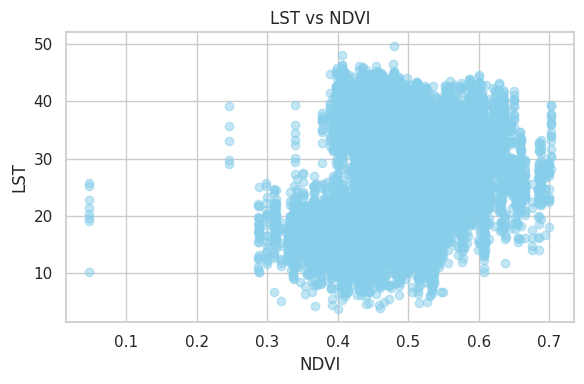

In [156]:
import matplotlib.pyplot as plt

# Visualitzar la relació entre LST i NDVI
plt.figure(figsize=(6, 4))
plt.scatter(TVDI_clear['NDVI'], TVDI_clear['LST_C'], alpha=0.5, color='skyblue')
plt.title('LST vs NDVI')
plt.xlabel('NDVI')
plt.ylabel('LST')
plt.grid(True)
plt.tight_layout()
plt.show()


Sandholt, I., Rasmussen, K., & Andersen, J. (2002).
A simple interpretation of the surface temperature/vegetation index space for assessment of surface moisture status. Remote Sensing of Environment, 79(2–3), 213–224.

Introducció original del triangle LST–NDVI; procediments bins per extreure parametres de cada bins


In [161]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

mod_hot  = smf.quantreg('LST_C ~ NDVI', TVDI_clear).fit(q=0.95)
mod_cold = smf.quantreg('LST_C ~ NDVI', TVDI_clear).fit(q=0.05)

hot_b, hot_m   = mod_hot.params['Intercept'], mod_hot.params['NDVI']
cold_b, cold_m = mod_cold.params['Intercept'], mod_cold.params['NDVI']

# Rang de NVDI global - Use TVDI_clear for consistent data range
ndvi_min, ndvi_max = TVDI_clear['NDVI'].min(), TVDI_clear['NDVI'].max()

# Evaluació de les rectes als extrems
vertex = pd.DataFrame([{
    'NDVI_min': ndvi_min,
    'LST_wet_min': cold_b + cold_m * ndvi_min,
    'LST_dry_min': hot_b  + hot_m  * ndvi_min,
    'NDVI_max': ndvi_max,
    'LST_wet_max': cold_b + cold_m * ndvi_max,
    'LST_dry_max': hot_b  + hot_m  * ndvi_max
}])

# Càlcul TVDI en cada punt - Calculate TVDI on TVDI_clear
TVDI_clear['TVDI'] = (
    (TVDI_clear['LST_C'] - (cold_b + cold_m * TVDI_clear['NDVI'])) /
    ((hot_b + hot_m * TVDI_clear['NDVI']) - (cold_b + cold_m * TVDI_clear['NDVI']))
)

El calcul del valor de TVDI és el punt més complex del proces de tractament de les dades.

Es necesari obtenir un valor que, si ve no l'abast d'aquests treball no requereix de fgran presició, si que es necesari que tingui consistència física.

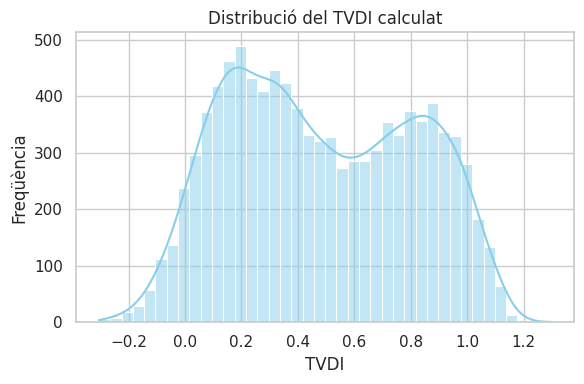

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# VHistograma TVDI calculat
plt.figure(figsize=(6, 4))
sns.histplot(TVDI_clear['TVDI'], kde=True, bins=40, color='skyblue', alpha=0.5)
plt.title('Distribució del TVDI calculat')
plt.xlabel('TVDI')
plt.ylabel('Freqüència')
plt.grid(True)
plt.tight_layout()
plt.show()

Previ aproximar el valor de TVDI, es considera necessari visualtizar una serie de dades a efectes de poder donar consistencia als valors obtinguts. No es pretén certificar que el valor és el més ajustat possible a la realitat, ja que no és l'objectiu del treball, però si de determinar que els valors obtinguts tenen prou consistència física com per poder considerar-los alhora de desenvolpuar els models de xarxa neuronal informada amb la físcia.

Així, s'han considerat tres visualtizacións, a part dels resultats obtinguts del valor de TDVI, que tali com s'ha mostrat en el histograma, practicament la totalitat de resultats estan dintre del rang previst de 0 i 1:

1- Gràfica de dispersió entre temperartura ambient de les dades Meteorologiques respecte el valor LST obtingut de MODIS, i per cadascun dels satel·lits, Aqua i Terra.

2- Histrogma dels valors totals de NDVI.

3- Evolució del valor de NVDI de cada grup de poligons sobre cadascun dels mesos i per cada any.

In [163]:
TVDI_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10014 entries, 8 to 26359
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campanya          10014 non-null  int64         
 1   EAM               10014 non-null  object        
 2   id_pol            10014 non-null  int64         
 3   lat_x             10014 non-null  float64       
 4   lon_x             10014 non-null  float64       
 5   Data              10014 non-null  datetime64[ns]
 6   Hora              10014 non-null  object        
 7   T                 10014 non-null  float64       
 8   Evo               10014 non-null  float64       
 9   I                 10014 non-null  float64       
 10  v                 10014 non-null  float64       
 11  Tmin              10014 non-null  float64       
 12  Tmax              10014 non-null  float64       
 13  H                 10014 non-null  object        
 14  Precipitacio_dia  10014 non

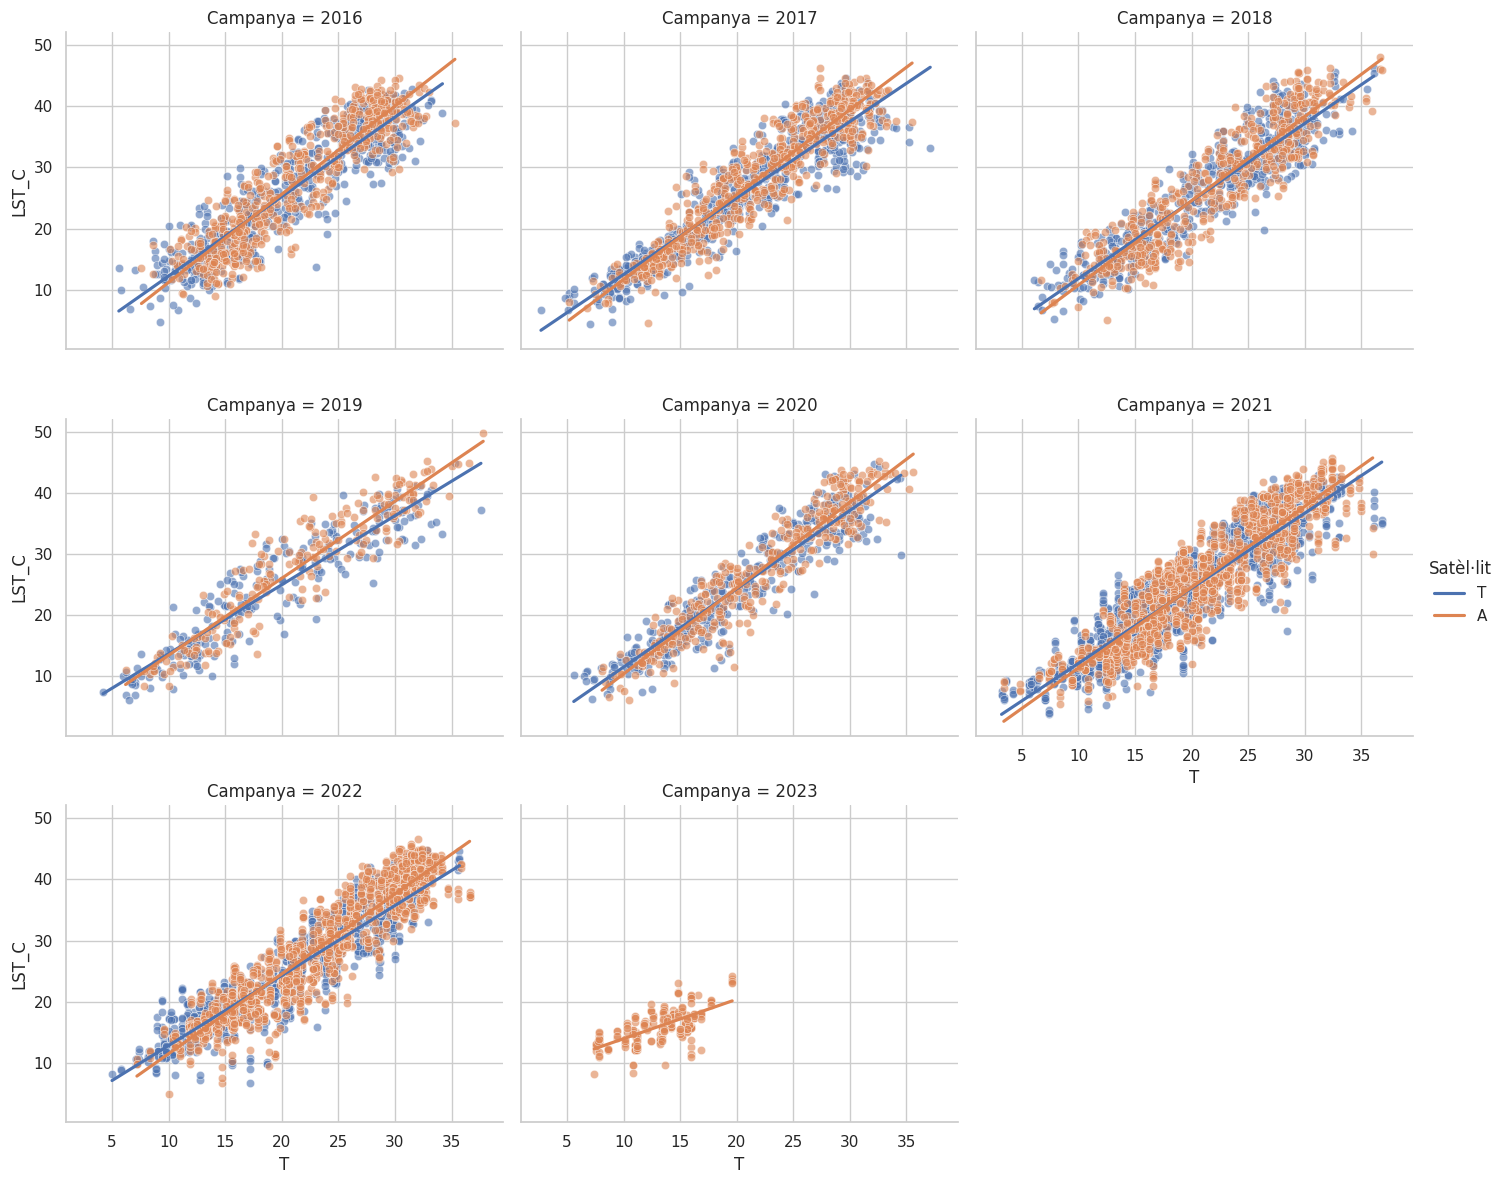

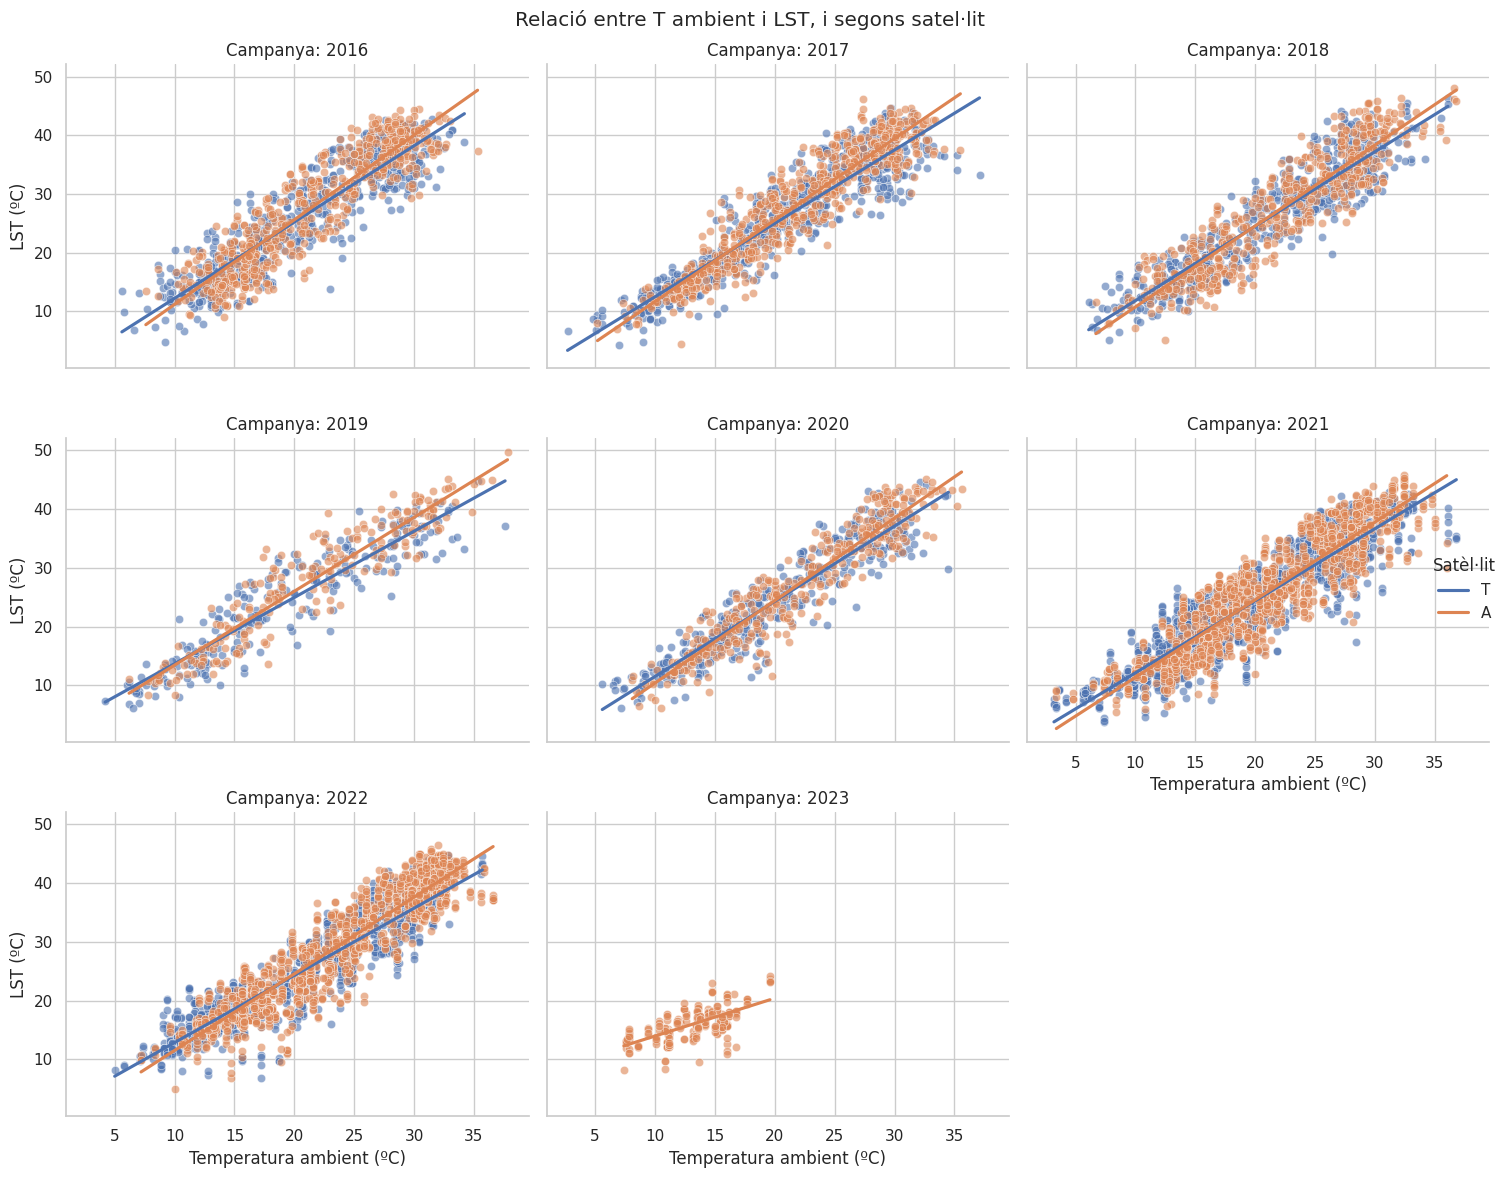

<Figure size 640x480 with 0 Axes>

In [164]:
#Analsiis de consistència física dels valors obtinguts de satèlit i calcul de temperatura de coberta.import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

TVDI_clear["Campanya"] = TVDI_clear["Campanya"].astype(str)
TVDI_clear["Satellit_x"] = TVDI_clear["Satellit_x"].astype(str)


sns.set(style="whitegrid")

# Gràfic amb 3 campanyes per fila, separació per campanya i colors per satèl·lit
g = sns.FacetGrid(
    TVDI_clear,
    col="Campanya",
    hue="Satellit_x",
    col_wrap=3,
    height=4,
    aspect=1.2,
    margin_titles=True
)

g.map_dataframe(sns.scatterplot, x="T", y="LST_C", alpha=0.6)
g.map_dataframe(sns.regplot, x="T", y="LST_C", scatter=False, ci=None)

g.add_legend(title="Satèl·lit")
#Analsiis de consistència física dels valors obtinguts de satèlit i calcul de temperatura de coberta.
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

TVDI_clear["Campanya"] = TVDI_clear["Campanya"].astype(str)
TVDI_clear["Satellit_x"] = TVDI_clear["Satellit_x"].astype(str)


sns.set(style="whitegrid")

# Gràfic amb 3 campanyes per fila, separació per campanya i colors per satèl·lit
g = sns.FacetGrid(
    TVDI_clear,
    col="Campanya",
    hue="Satellit_x",
    col_wrap=3,
    height=4,
    aspect=1.2,
    margin_titles=True
)

g.map_dataframe(sns.scatterplot, x="T", y="LST_C", alpha=0.6)
g.map_dataframe(sns.regplot, x="T", y="LST_C", scatter=False, ci=None)

g.add_legend(title="Satèl·lit")
g.set_axis_labels("Temperatura ambient (ºC)", "LST (ºC)")
g.set_titles(col_template="Campanya: {col_name}")
g.fig.subplots_adjust(top=0.5)
g.fig.suptitle("Relació entre T ambient i LST, i segons satel·lit")

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


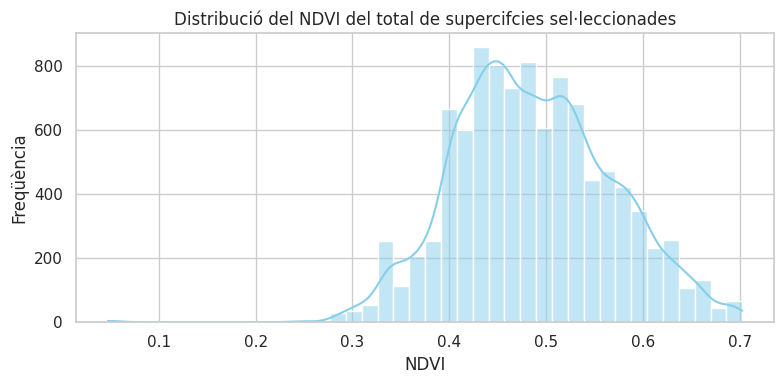

In [165]:
#Visualització histgrama dels valors de NDVI extrets de GEE.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(TVDI_clear['NDVI'], kde=True, bins=40, color='skyblue')
plt.title('Distribució del NDVI del total de supercifcies sel·leccionades')
plt.xlabel('NDVI')
plt.ylabel('Freqüència')
plt.grid(True)
plt.tight_layout()
plt.show()

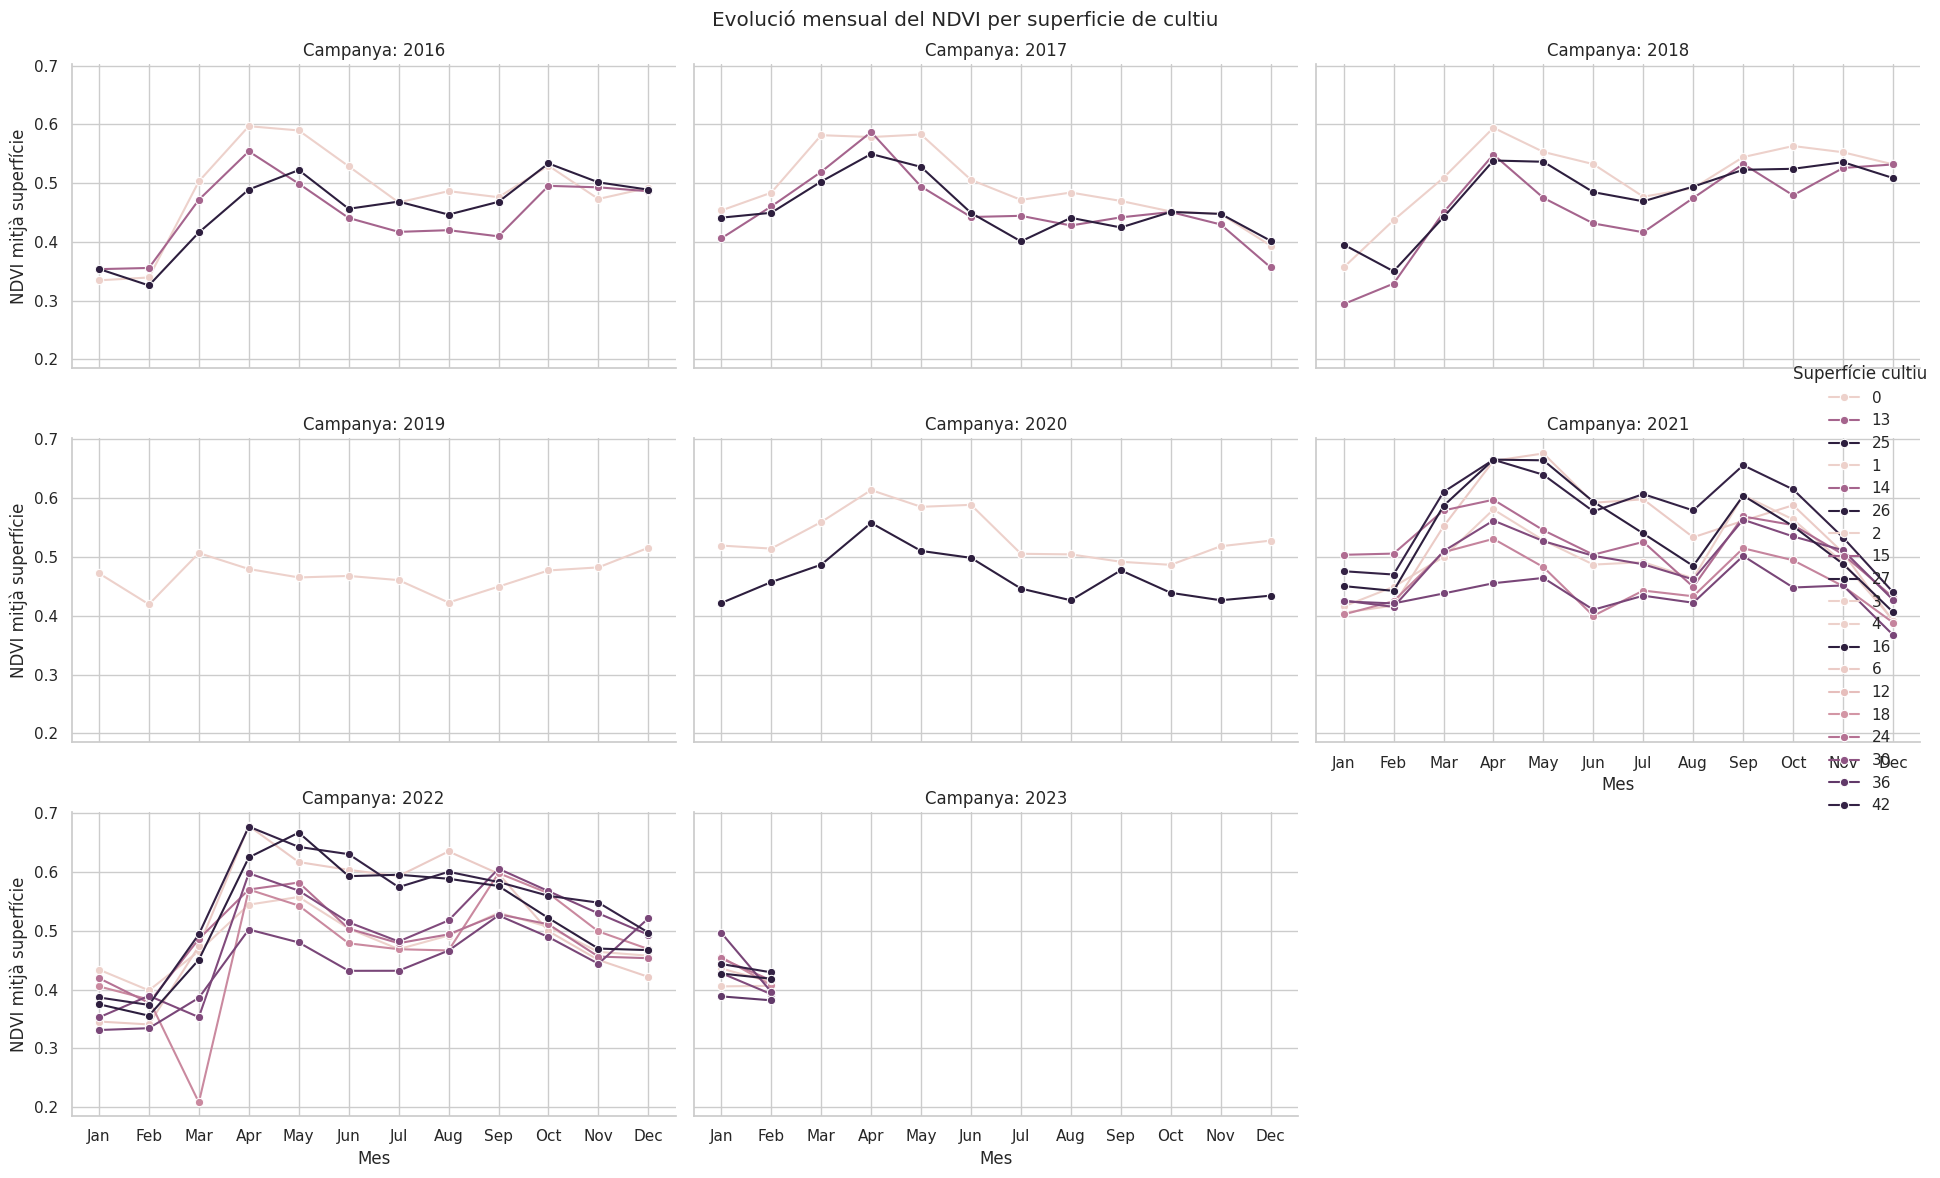

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Distribuició NDVI per agrupació de superficie i campanaya

TVDI_clear["Data"] = pd.to_datetime(TVDI_clear["Data"])
TVDI_clear["Mes"] = TVDI_clear["Data"].dt.month


ndvi_by_parcela = TVDI_clear.groupby(["Campanya", "id_pol", "Mes"])["NDVI"].mean().reset_index()

ndvi_by_parcela["Mes_nom"] = ndvi_by_parcela["Mes"].apply(lambda x: calendar.month_abbr[x])
ndvi_by_parcela["Mes_nom"] = pd.Categorical(
    ndvi_by_parcela["Mes_nom"],
    categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    ordered=True
)

sns.set(style="whitegrid")

g = sns.FacetGrid(ndvi_by_parcela, col="Campanya", col_wrap=3, height=4, aspect=1.5, margin_titles=True)
g.map_dataframe(sns.lineplot, x="Mes_nom", y="NDVI", hue="id_pol", marker="o")

g.add_legend(title="Superfície cultiu")
g.set_axis_labels("Mes", "NDVI mitjà superfície")
g.set_titles(col_template="Campanya: {col_name}")
g.fig.subplots_adjust(top=0.5)
g.fig.suptitle("Evolució mensual del NDVI per superficie de cultiu")

plt.tight_layout()
plt.show()

In [167]:
#eliminar nulls
TVDI_clear.dropna(inplace=True)

Adicionalment, s'incorpora una variable categoria adicional en relació a la maduresa del cultiu.

A partir de l'evoluició de les dades de NDVI de cada parcela, es pot observar que totes tenenen la mateixa evolució durant l'any. Així, es planteja la hipòtesis de establir una categoria de caracteristica del cultiu "cat_cultiu", que bé per la maduresa del cultiu o la morfologia de com esta cultivat, pugui donar informació complementaria i general al model.

Així, es confeccióna la nova variable a partir del valor mitjà de HDVI, per grup de parcela.

Cal dir que només es una aproximació, i és realtiza a partir de la mitjana d'entre totes les campanyes ja que el grau de cobrerta no només pot estar determinat pel grau de maduresa del cultiu, sinó també per les condicions climàtiques de cada campanya.

In [169]:
# Creació variable categoria en 6 nivells
ndvi_mitjanes = TVDI_clear.groupby('id_pol')['NDVI'].mean()
TVDI_clear['NDVI_mitja'] = TVDI_clear['id_pol'].map(ndvi_mitjanes)
TVDI_clear['cat_cultiu'] = pd.qcut(
    TVDI_clear['NDVI_mitja'],
    q=6,
    labels=["A", "B", "C", "D", "F", "G"]
)

In [170]:
# Rangs de NVDI de cada categoria creada
categories = TVDI_clear['cat_cultiu'].cat.categories
intervals = pd.qcut(TVDI_clear['NDVI_mitja'], q=6, retbins=True)[1]
for i, category in enumerate(categories):
    print(f"cat_cultiu {category}: [{intervals[i].round(3)}, {intervals[i + 1].round(3)}]")

cat_cultiu A: [0.387, 0.458]
cat_cultiu B: [0.458, 0.463]
cat_cultiu C: [0.463, 0.484]
cat_cultiu D: [0.484, 0.496]
cat_cultiu F: [0.496, 0.529]
cat_cultiu G: [0.529, 0.568]


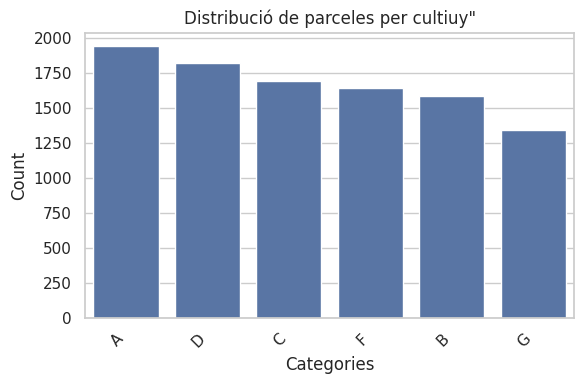

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribució tipus de cultius
value_counts = TVDI_clear['cat_cultiu'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='cat_cultiu', data=TVDI_clear, order=value_counts.index)
plt.title('Distribució de parceles per cultiuy"')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [173]:
#Dataframe per models de xarxa neuronals
TVDI_model = TVDI_clear[['Data', 'Hora', 'Mes', 'Campanya', 'EAM', 'id_pol', 'cat_cultiu', 'T', 'Tmax', 'Tmin','H', 'I', 'Evo','v', 'Precipitacio_dia','TVDI']]
TVDI_model['H'] = TVDI_model['H'].astype(int)
TVDI_model.to_csv('/content/drive/MyDrive/Colab Notebooks/data/TVDI_model.csv', index=False)
TVDI_model.info()

<ipython-input-173-23eeb646b24a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TVDI_model['H'] = TVDI_model['H'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Index: 10014 entries, 8 to 26359
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              10014 non-null  datetime64[ns]
 1   Hora              10014 non-null  object        
 2   Mes               10014 non-null  int32         
 3   Campanya          10014 non-null  object        
 4   EAM               10014 non-null  object        
 5   id_pol            10014 non-null  int64         
 6   cat_cultiu        10014 non-null  category      
 7   T                 10014 non-null  float64       
 8   Tmax              10014 non-null  float64       
 9   Tmin              10014 non-null  float64       
 10  H                 10014 non-null  int64         
 11  I                 10014 non-null  float64       
 12  Evo               10014 non-null  float64       
 13  v                 10014 non-null  float64       
 14  Precipitacio_dia  10014 non